In [1]:
from Functions import*


In [2]:
from statistics import *

In [3]:
test_list_covid, train_list_covid,val_list_covid=create_list_to_load(covid=True)

test_list_Noncovid, train_list_Noncovid,val_list_Noncovid=create_list_to_load(covid=False)

In [4]:
test_covid_labels=create_list_labels(test_list_covid,covid=True)
train_covid_labels=create_list_labels(train_list_covid,covid=True)
val_covid_labels=create_list_labels(val_list_covid,covid=True)

test_Noncovid_labels=create_list_labels(test_list_Noncovid,covid=False)
train_Noncovid_labels=create_list_labels(train_list_Noncovid,covid=False)
val_Noncovid_labels=create_list_labels(val_list_Noncovid,covid=False)

In [5]:
test_list,test_labels=concatenate_lists_and_labels(test_list_covid,test_covid_labels,test_list_Noncovid,test_Noncovid_labels)
train_list,train_labels=concatenate_lists_and_labels(train_list_covid,train_covid_labels,train_list_Noncovid,train_Noncovid_labels)
val_list,val_labels=concatenate_lists_and_labels(val_list_covid,val_covid_labels,val_list_Noncovid,val_Noncovid_labels)

In [6]:
test_list,test_labels=shuffle_lists(test_list, test_labels)
train_list,train_labels=shuffle_lists(train_list, train_labels)
val_list,val_labels=shuffle_lists(val_list, val_labels)




In [7]:
total_list=test_list+train_list+val_list
total_labels=test_labels+train_labels+val_labels

In [8]:
total_list,total_labels=shuffle_lists(total_list, total_labels)

train_percent=0.8
length = len(total_list)
train_length = int(length*train_percent)

train_set=total_list[0:train_length]
train_labels=total_labels[0:train_length]
val_set=total_list[:train_length]
val_labels=total_labels[:train_length]

In [9]:
def load_data(data_list,img_w,img_h,img_ch):
    tab = np.zeros((len(data_list),img_w,img_h,img_ch),dtype='float32')
    tab2 = np.zeros((len(data_list),img_w,img_h,img_ch),dtype='float32')
    tab_mean = []
    tab_std = []
    for i in range(len(data_list)):
        Img = cv2.imread(data_list[i],0)
        Img = cv2.resize(Img,(img_w, img_h))
        Img = Img.reshape(img_w,img_h)/255
        tab[i,:,:,0]=Img
        tab_mean.append(Img.mean())
        tab_std.append(Img.std())
    set_mean = mean(tab_mean)
    set_std = stdev(tab_std)
    for i in range(len(data_list)):
        tab2[i,:,:,0]=(tab[i,:,:,0]-set_mean)/set_std          
    return tab2

In [10]:
#the article precises the size of the images as (480,480)

img_w,img_h,img_ch=480,480,1


train_set=load_data(train_set,img_w,img_h,img_ch)
val_set=load_data(val_set,img_w,img_h,img_ch)


train_labels=np.array(train_labels)
val_labels=np.array(val_labels)


In [11]:
from skimage.io import imshow

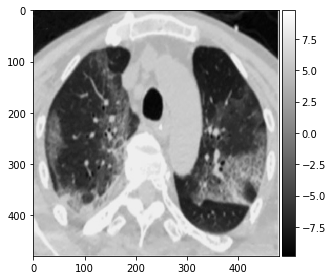

In [12]:
imshow(np.squeeze(train_set[0]),cmap='gray')

In [13]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [14]:
INPUT_SHAPE=480,480,1
N_CLASSES=1

K.clear_session()
my_model=Alex_model(1,480,480)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 480, 480, 8)       80        
_________________________________________________________________
activation (Activation)      (None, 480, 480, 8)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 240, 240, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 240, 240, 16)      1168      
_________________________________________________________________
activation_1 (Activation)    (None, 240, 240, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 120, 120, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 120, 32)      4

In [15]:
learning_rate=0.0001
optimizer=Adam(learning_rate)
batch_size=16
loss_function = 'binary_crossentropy'
metrics=['binary_accuracy',precision,recall]
n_epochs=100

In [16]:
my_model.compile(loss=loss_function,optimizer = optimizer,metrics=['binary_accuracy'])

In [17]:
model_hist=my_model.fit(train_set,train_labels,batch_size,n_epochs,validation_data=(val_set, val_labels))

Train on 596 samples, validate on 596 samples
Epoch 1/100
596/596 [==============================] - 3s 6ms/sample - loss: 0.7340 - binary_accuracy: 0.5436 - val_loss: 0.6513 - val_binary_accuracy: 0.7114
Epoch 2/100
596/596 [==============================] - 2s 4ms/sample - loss: 0.6567 - binary_accuracy: 0.6007 - val_loss: 0.6013 - val_binary_accuracy: 0.6795
Epoch 3/100
596/596 [==============================] - 2s 4ms/sample - loss: 0.6255 - binary_accuracy: 0.6426 - val_loss: 0.5379 - val_binary_accuracy: 0.7634
Epoch 4/100
596/596 [==============================] - 2s 4ms/sample - loss: 0.5546 - binary_accuracy: 0.7030 - val_loss: 0.4958 - val_binary_accuracy: 0.8188
Epoch 5/100
596/596 [==============================] - 2s 4ms/sample - loss: 0.4914 - binary_accuracy: 0.7668 - val_loss: 0.3673 - val_binary_accuracy: 0.8708
Epoch 6/100
596/596 [==============================] - 2s 4ms/sample - loss: 0.4519 - binary_accuracy: 0.7550 - val_loss: 0.3223 - val_binary_accuracy: 0.9077


Epoch 52/100
596/596 [==============================] - 2s 4ms/sample - loss: 0.1233 - binary_accuracy: 0.9144 - val_loss: 5.8335e-04 - val_binary_accuracy: 1.0000
Epoch 53/100
596/596 [==============================] - 2s 4ms/sample - loss: 0.1370 - binary_accuracy: 0.9128 - val_loss: 4.9119e-04 - val_binary_accuracy: 1.0000
Epoch 54/100
596/596 [==============================] - 2s 4ms/sample - loss: 0.1470 - binary_accuracy: 0.9128 - val_loss: 0.0011 - val_binary_accuracy: 1.0000
Epoch 55/100
596/596 [==============================] - 2s 4ms/sample - loss: 0.1561 - binary_accuracy: 0.8960 - val_loss: 6.8441e-04 - val_binary_accuracy: 1.0000
Epoch 56/100
596/596 [==============================] - 2s 4ms/sample - loss: 0.1502 - binary_accuracy: 0.9161 - val_loss: 4.9013e-04 - val_binary_accuracy: 1.0000
Epoch 57/100
596/596 [==============================] - 2s 4ms/sample - loss: 0.1252 - binary_accuracy: 0.9144 - val_loss: 3.5207e-04 - val_binary_accuracy: 1.0000
Epoch 58/100
596/596

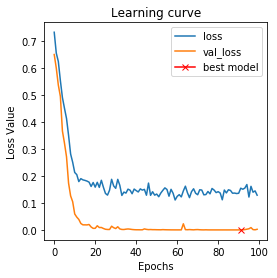

In [18]:
loss_curves_plot(model_hist)

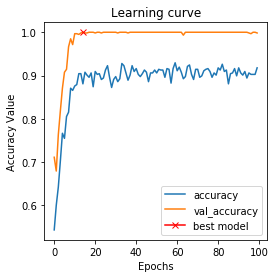

In [19]:
accuracy_curves_plot(model_hist,'binary_accuracy')

0


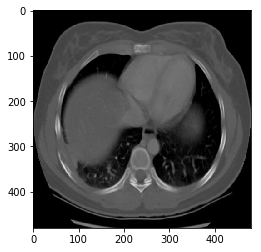

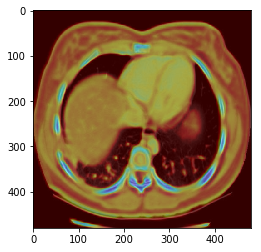

In [22]:
Sample = train_list[9]
Img = imread(Sample)
Img = Img[:,:,0]
Img = Img/255
Img = resize(Img, (img_h, img_w), anti_aliasing = True).astype('float32')
Img = np.expand_dims(Img, axis = 2)
Img = np.expand_dims(Img, axis = 0)
preds = my_model.predict(Img)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = my_model.output[:, class_idx]
last_conv_layer = my_model.get_layer("conv2d_4")
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([my_model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([Img])
for i in range(16):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
img = cv2.imread(Sample)
img = cv2.resize(img, (480, 480), interpolation = cv2.INTER_AREA)
#img = img/255
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(superimposed_img)